In [2]:
import numpy as np

from matplotlib import pyplot as plt

import pymc3 as pm

In [3]:
t = np.linspace(0,3,30)

Amp = 5

Freq = 5

Phase = np.pi

Noise_t = np.random.normal(0,1,size=len(t))

data = Amp*np.sin(Freq*t + Phase) + Noise_t
x = Amp*np.sin(Freq*t + Phase)

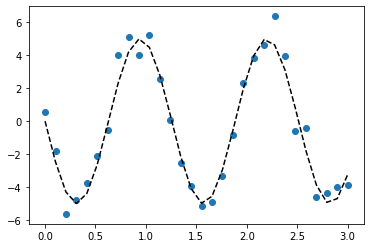

In [4]:
plt.scatter(t,data)
plt.plot(t, x, '--k')

In [5]:
with pm.Model() as sinmodel:
    
    amp = pm.HalfNormal('amplitude', mu=0, sd=5)
    freq = pm.Uniform('frequency', lower=0 , upper=10)
    phase = pm.Uniform('phase shift', lower=0, upper=2*np.pi)
    
    σ = pm.HalfNormal('noise_sd', sd=1)
    
    y = amp*pm.math.sin(freq*t + phase)
    
    y_obs = pm.Normal('Y_obs', mu=y , sd=σ, observed=data)   

TypeError: __init__() got an unexpected keyword argument 'mu'

In [ ]:
with sinmodel:
    start = pm.find_MAP()
    trace = pm.sample(5000, start=start, tune=1000)

In [ ]:
pm.traceplot(trace)

In [7]:
duration = 2
srate = 128
dt = 1/srate
times = np.arange(srate*duration)*dt

In [1]:
#white noise
sigma=1.
noise = np.random.normal(scale=sigma, size=len(times))
plt.plot(times, noise)
plt.xlabel('times[s]');

NameError: name 'np' is not defined

In [9]:
from IPython.display import Audio

In [10]:
Audio(noise, rate=srate)

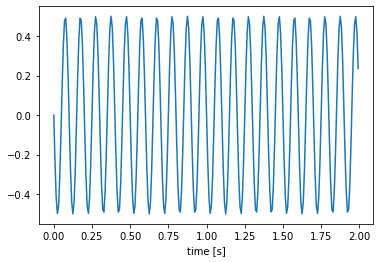

In [33]:
A = .5
f = 10
ϕ = np.pi

signal = A * np.sin(2*np.pi*f*times + ϕ)
plt.plot(times, signal)
plt.xlabel('time [s]');

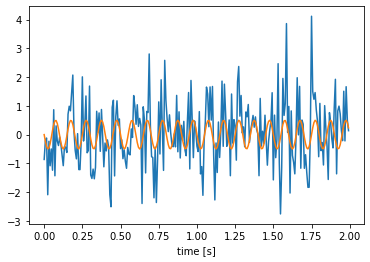

In [34]:
data = noise + signal
plt.plot(times, data)
plt.plot(times, signal)
plt.xlabel('time [s]');

In [35]:
from scipy import signal

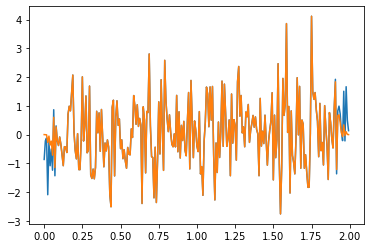

In [36]:
window = signal.windows.tukey(len(data), .1)
datawindowed = data*window

plt.plot(times, data)
plt.plot(times, datawindowed)

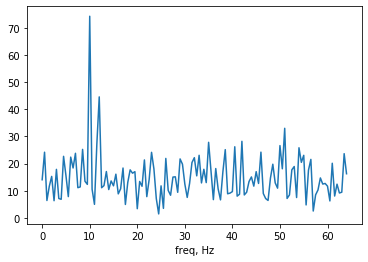

In [37]:
data_f = np.fft.rfft(datawindowed)
freqs = np.fft.rfftfreq(len(data), d=1/srate)

plt.plot(freqs, np.abs(data_f))
plt.xlabel('freq, Hz');

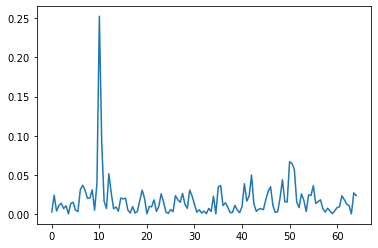

In [38]:
psd_freq, psd= signal.welch(data,fs=srate)
plt.plot(psd_freq, psd);

In [ ]:
r